In [1]:
!pip install spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-03-07 00:27:56.772945: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-07 00:27:56.772978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import pandas
book=pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 11 - Text Mining/Twitter user tweets.txt",error_bad_lines=False)

b'Skipping line 36: expected 1 fields, saw 3\n'


In [4]:
book

,x
0,"Awkward embarrassed n yet delighted, honoured,..."
1,Yahan toh ek selfie banti hai. The world's big...
2,Har andaaz mein FRSHness!
3,To all my fans.. thank u for your love support...
4,Enjoy your stay at the celebrity home ‘Chhota ...
5,"Ye future ready hain, 5G ke sath fastest charg..."
6,Desh ke har kono se music ke peshewar khiladi ...
7,Happy Republic Day to all. Public ke saath mil...
8,"Stay Frsh, Stay safe n Stay fit ..."
9,Rest in peace Pista...


In [5]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['Awkward embarrassed n yet delighted, honoured, privileged n over the moon to display my work amongst such great artist n legends like Raja Ravi Varma, Abanindranath Tagore, & VS Gaitonde. In all humility, thank u for the honour!',
 "Yahan toh ek selfie banti hai. The world's biggest music league is here! Chal MEGA SELFIE lele re.",
 'Har andaaz mein FRSHness!',
 'To all my fans.. thank u for your love support n concern. Khayal rakho apna n parivaar ka. God bless n loveee u tooo...',
 'Enjoy your stay at the celebrity home ‘Chhota Mahal’ Bara Bungalow, Amer with super hospitality. Feel at home whilst in #Jaipur',
 'Ye future ready hain, 5G ke sath fastest charging bhi or hai badiya display and awesome design.',
 'Desh ke har kono se music ke peshewar khiladi aayengey ek saath, duniya ki pehli music league mein likhengey ek naya itihaas. Dekhiye',
 'Happy Republic Day to all. Public ke saath mill jull ke raho , reunite , repay with love affection kindness  n rejoice . Jai Hind!',
 'Sta

In [6]:
# Joining the list into one string/text
text = ' '.join(book)
text

"Awkward embarrassed n yet delighted, honoured, privileged n over the moon to display my work amongst such great artist n legends like Raja Ravi Varma, Abanindranath Tagore, & VS Gaitonde. In all humility, thank u for the honour! Yahan toh ek selfie banti hai. The world's biggest music league is here! Chal MEGA SELFIE lele re. Har andaaz mein FRSHness! To all my fans.. thank u for your love support n concern. Khayal rakho apna n parivaar ka. God bless n loveee u tooo... Enjoy your stay at the celebrity home ‘Chhota Mahal’ Bara Bungalow, Amer with super hospitality. Feel at home whilst in #Jaipur Ye future ready hain, 5G ke sath fastest charging bhi or hai badiya display and awesome design. Desh ke har kono se music ke peshewar khiladi aayengey ek saath, duniya ki pehli music league mein likhengey ek naya itihaas. Dekhiye Happy Republic Day to all. Public ke saath mill jull ke raho , reunite , repay with love affection kindness  n rejoice . Jai Hind! Stay Frsh, Stay safe n Stay fit ... 

In [7]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Awkward embarrassed n yet delighted honoured privileged n over the moon to display my work amongst such great artist n legends like Raja Ravi Varma Abanindranath Tagore  VS Gaitonde In all humility thank u for the honour Yahan toh ek selfie banti hai The worlds biggest music league is here Chal MEGA SELFIE lele re Har andaaz mein FRSHness To all my fans thank u for your love support n concern Khayal rakho apna n parivaar ka God bless n loveee u tooo Enjoy your stay at the celebrity home ‘Chhota Mahal’ Bara Bungalow Amer with super hospitality Feel at home whilst in Jaipur Ye future ready hain 5G ke sath fastest charging bhi or hai badiya display and awesome design Desh ke har kono se music ke peshewar khiladi aayengey ek saath duniya ki pehli music league mein likhengey ek naya itihaas Dekhiye Happy Republic Day to all Public ke saath mill jull ke raho  reunite  repay with love affection kindness  n rejoice  Jai Hind Stay Frsh Stay safe n Stay fit  Rest in peace Pista Excited to be a 

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Awkward', 'embarrassed', 'n', 'yet', 'delighted', 'honoured', 'privileged', 'n', 'over', 'the', 'moon', 'to', 'display', 'my', 'work', 'amongst', 'such', 'great', 'artist', 'n', 'legends', 'like', 'Raja', 'Ravi', 'Varma', 'Abanindranath', 'Tagore', 'VS', 'Gaitonde', 'In', 'all', 'humility', 'thank', 'u', 'for', 'the', 'honour', 'Yahan', 'toh', 'ek', 'selfie', 'banti', 'hai', 'The', 'worlds', 'biggest', 'music', 'league', 'is', 'here']


In [9]:
len(text_tokens)

618

In [10]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Awkward', 'embarrassed', 'n', 'yet', 'delighted', 'honoured', 'privileged', 'n', 'moon', 'display', 'work', 'amongst', 'great', 'artist', 'n', 'legends', 'like', 'Raja', 'Ravi', 'Varma', 'Abanindranath', 'Tagore', 'VS', 'Gaitonde', 'In', 'humility', 'thank', 'u', 'honour', 'Yahan', 'toh', 'ek', 'selfie', 'banti', 'hai', 'The', 'worlds', 'biggest', 'music', 'league']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['awkward', 'embarrassed', 'n', 'yet', 'delighted', 'honoured', 'privileged', 'n', 'moon', 'display', 'work', 'amongst', 'great', 'artist', 'n', 'legends', 'like', 'raja', 'ravi', 'varma', 'abanindranath', 'tagore', 'vs', 'gaitonde', 'in']


In [12]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['awkward', 'embarrass', 'n', 'yet', 'delight', 'honour', 'privileg', 'n', 'moon', 'display', 'work', 'amongst', 'great', 'artist', 'n', 'legend', 'like', 'raja', 'ravi', 'varma', 'abanindranath', 'tagor', 'vs', 'gaitond', 'in', 'humil', 'thank', 'u', 'honour', 'yahan', 'toh', 'ek', 'selfi', 'banti', 'hai', 'the', 'world', 'biggest', 'music', 'leagu']


In [13]:
#!python -m spacy download en

In [14]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [15]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Awkward embarrassed n yet delighted honoured privileged n moon display work amongst great artist n legends like Raja Ravi Varma Abanindranath Tagore VS Gaitonde In humility thank u honour Yahan toh ek selfie banti hai The worlds biggest music league


In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['Awkward', 'embarrass', 'n', 'yet', 'delighted', 'honoured', 'privileged', 'n', 'moon', 'display', 'work', 'amongst', 'great', 'artist', 'n', 'legend', 'like', 'Raja', 'Ravi', 'Varma', 'Abanindranath', 'Tagore', 'VS', 'Gaitonde', 'in']


#### Feature Extraction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [18]:
print(vectorizer.vocabulary_)

{'awkward': 32, 'embarrass': 94, 'yet': 330, 'delighted': 75, 'honoured': 142, 'privileged': 241, 'moon': 210, 'display': 84, 'work': 322, 'amongst': 22, 'great': 124, 'artist': 27, 'legend': 189, 'like': 191, 'raja': 251, 'ravi': 253, 'varma': 313, 'abanindranath': 18, 'tagore': 295, 'vs': 314, 'gaitonde': 118, 'in': 150, 'humility': 148, 'thank': 301, 'honour': 140, 'yahan': 326, 'toh': 306, 'ek': 93, 'selfie': 275, 'banti': 36, 'hai': 126, 'the': 302, 'world': 323, 'big': 43, 'music': 214, 'league': 187, 'chal': 55, 'mega': 203, 'lele': 190, 'har': 131, 'andaaz': 23, 'mein': 204, 'frshness': 115, 'to': 304, 'fan': 101, 'love': 197, 'support': 293, 'concern': 65, 'khayal': 174, 'rakho': 252, 'apna': 26, 'parivaar': 229, 'ka': 166, 'god': 122, 'bless': 46, 'loveee': 198, 'tooo': 307, 'enjoy': 95, 'stay': 288, 'celebrity': 54, 'home': 139, 'chhota': 58, 'mahal': 199, 'bara': 37, 'bungalow': 51, 'amer': 21, 'super': 292, 'hospitality': 144, 'feel': 105, 'whilst': 318, 'jaipur': 160, 'ye

In [19]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['break', 'bungalow', 'burai', 'celebrate', 'celebrity', 'chal', 'charge', 'check', 'chhota', 'cinematic', 'click', 'clothing', 'collection', 'come', 'comeback', 'concern', 'condolence', 'congratulations', 'country', 'daane', 'dabangg', 'day', 'dearest', 'dedication', 'dekhiye', 'delighted', 'dependable', 'desh', 'design', 'dewana', 'dher', 'dhulai', 'dil', 'discount', 'display', 'diwali', 'do', 'doctor', 'doctorsday', 'door', 'duniya', 'dussehra', 'edition', 'ek', 'embarrass', 'enjoy', 'every', 'excite', 'exclusive', 'face']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
print(X.toarray().shape)

(500, 333)


#### Let's see how can bigrams and trigrams can be included here

In [21]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [22]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['50', 'aaj', 'aapke', 'all', 'all the', 'and', 'at', 'aur', 'autumn', 'autumn winter', 'autumn winter collection', 'be', 'being', 'being human', 'being human clothing', 'best', 'best for', 'bharat', 'bharat lal', 'bharat lal mritak', 'biggest', 'clothing', 'collection', 'daane', 'dabangg', 'day', 'dekhiye', 'dil', 'display', 'do', 'duniya', 'ek', 'festival', 'film', 'flat', 'flat 50', 'for', 'for the', 'from', 'frsh', 'frshness', 'hai', 'hain', 'happy', 'har', 'hind', 'ho', 'home', 'human', 'human clothing', 'in', 'india', 'is', 'jai', 'jai hind', 'ka', 'ke', 'ke saath', 'khush', 'ki', 'lal', 'lal mritak', 'like', 'liye', 'love', 'love support', 'mein', 'mritak', 'music', 'music league', 'my', 'na', 'now', 'of', 'off', 'on', 'or', 'saath', 'se', 'selfie', 'sir', 'stay', 'stay safe', 'support', 'thank', 'thank for', 'thank for the', 'the', 'the best', 'this', 'to', 'to all', 'toh', 'ur', 'very', 'what', 'winter', 'wishing', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 .

#### TFidf vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '50', 'aaj', 'aapke', 'ab', 'all', 'all the', 'and', 'at', 'aur', 'autumn', 'autumn winter', 'autumn winter collection', 'be', 'being', 'being human', 'being human clothing', 'best', 'best for', 'bharat', 'bharat lal', 'bharat lal mritak', 'biggest', 'clothing', 'collection', 'daane', 'dabangg', 'day', 'dekhiye', 'dil', 'display', 'do', 'duniya', 'ek', 'father', 'festival', 'festival of', 'festival of india', 'film', 'film festival', 'film festival of', 'flat', 'flat 50', 'for', 'for the', 'from', 'frsh', 'frshness', 'hai', 'hain', 'happy', 'har', 'hind', 'ho', 'home', 'hope', 'human', 'human clothing', 'in', 'india', 'is', 'jai', 'jai hind', 'ka', 'karo', 'ke', 'ke saath', 'khush', 'ki', 'ko', 'ko dil', 'ko dil se', 'kono', 'kono se', 'kono se music', 'kya', 'kya hai', 'kya hai bharat', 'kyu', 'kyu rahein', 'kyu rahein aap', 'lal', 'lal mritak', 'lal mritak jisse', 'lal mritak thinking', 'le', 'le kar', 'le kar aye', 'league', 'league is', 'league is here', 'league mein', 'leag

####  Generate wordcloud

In [24]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

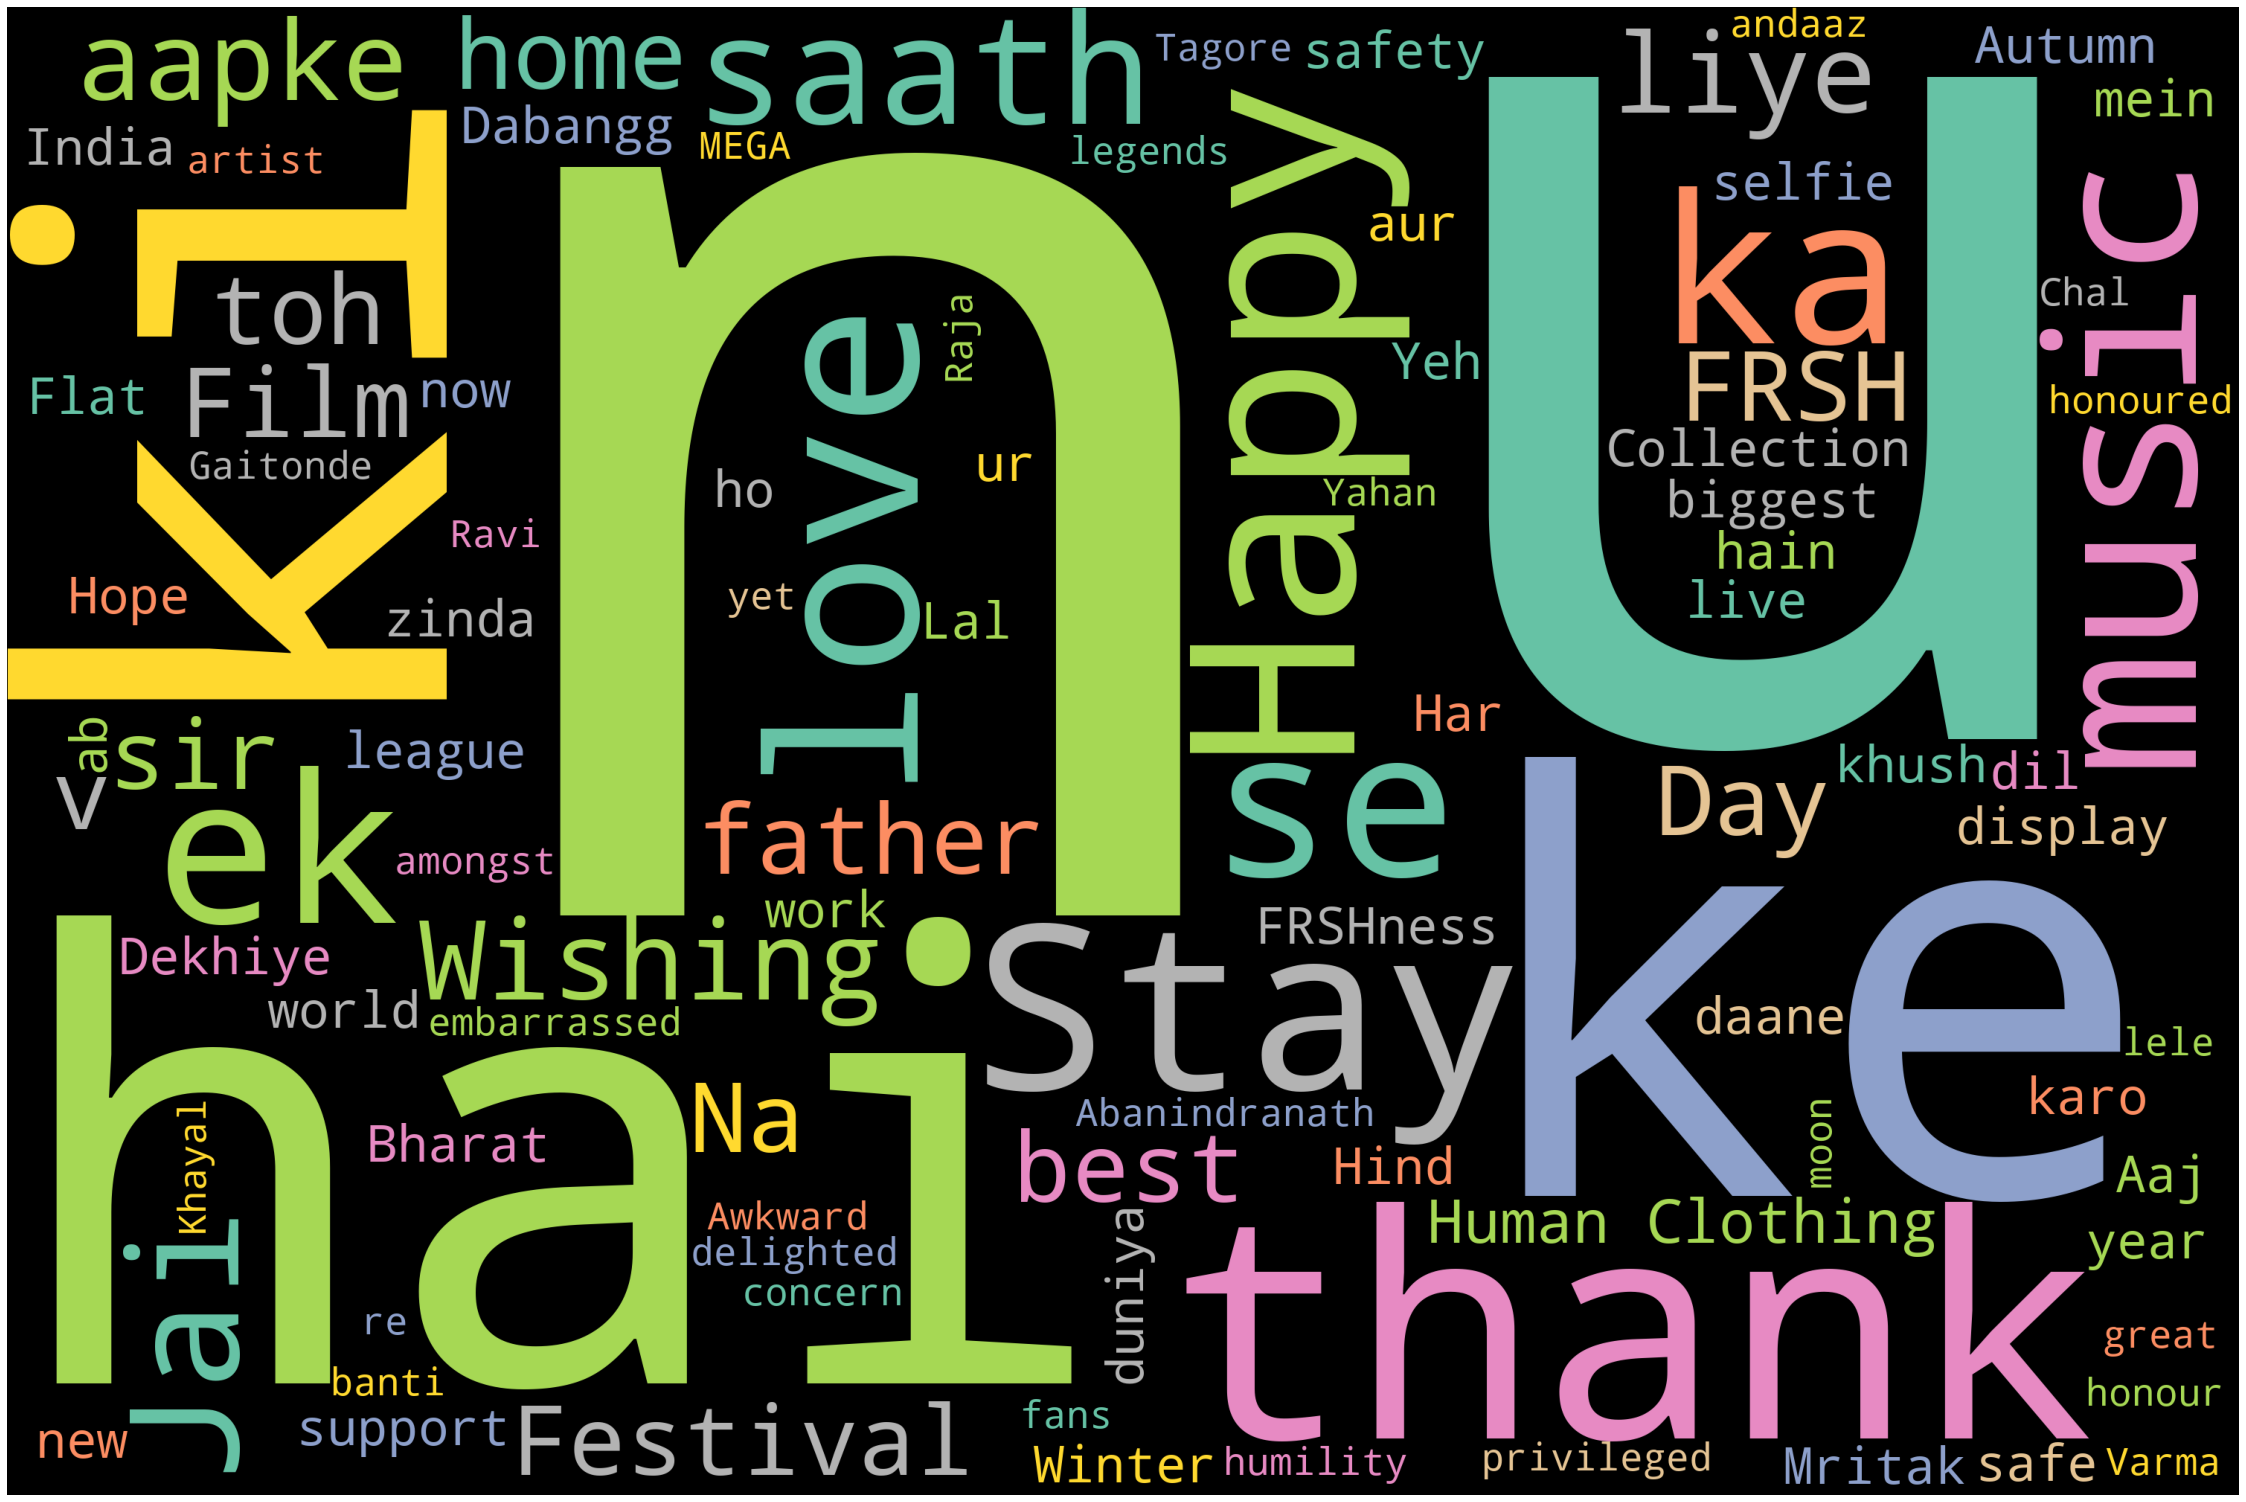

In [25]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)